In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import matplotlib.pyplot as plt
import cv2
import sys
import os

In [3]:
# 폴더에서 이미지 불러오기
# IMG_DIR = 'D:/Ai/project/emotion_detection_dataset/fer2013/train/Angry/' #폴더 위치
# cnt = 1
# plt.figure(figsize = (30,30))
# for dirname, _, filenames in os.walk(IMG_DIR):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         if cnt >25:
#             continue
#         plt.subplot(5,5,cnt)
#         imgfile = dirname+'/'+filename
#         img = plt.imread(imgfile)
#         plt.imshow(img,cmap = 'bone')
#         plt.grid(False)
#         cnt += 1

In [58]:
dir = "C:/Ai/project/dataset/FacemaskDetector/dataset"

In [59]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               rotation_range=0.2, #random
                               width_shift_range=0.2, #좌우 이동
                               height_shift_range=0.2, #상하 이동
                               zoom_range = 0.2, 
                               horizontal_flip=True,
                               validation_split = 0.02) #????

test_gen = ImageDataGenerator(rescale= 1/255.,
                              validation_split = 0.2) #train:test = 8:2

In [61]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 16269 images belonging to 3 classes.
Found 3318 images belonging to 3 classes.


In [62]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

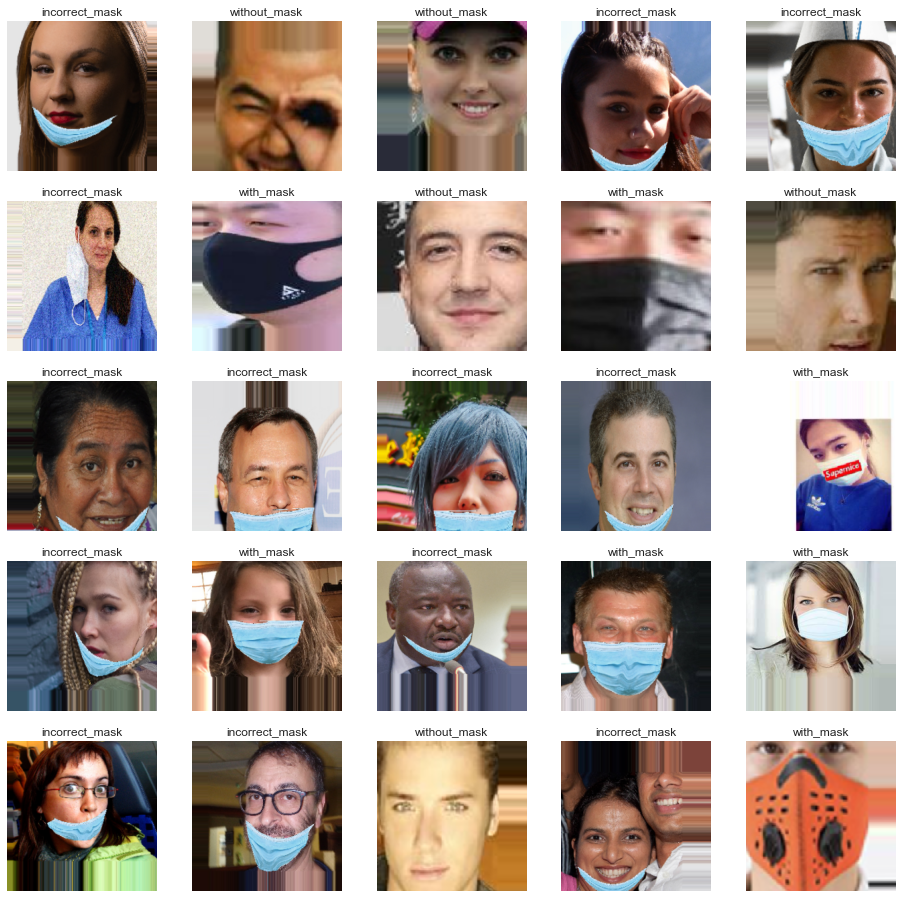

In [63]:
plt.figure(figsize = (16,16))

for i in range(25): #최대 25
  image,label = train_data.next()

  plt.subplot(5,5,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

In [64]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 223, 223, 64)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 110, 110, 64)      16448     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 54, 54, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 46656)            

In [66]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [67]:
# fitting data to the model

model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/5
509/509 [==============================] - 414s 814ms/step - loss: 0.5896 - accuracy: 0.7570 - val_loss: 0.5044 - val_accuracy: 0.8140
Epoch 2/5
509/509 [==============================] - 422s 828ms/step - loss: 0.3913 - accuracy: 0.8514 - val_loss: 0.3127 - val_accuracy: 0.8770
Epoch 3/5
509/509 [==============================] - 420s 826ms/step - loss: 0.3368 - accuracy: 0.8774 - val_loss: 0.2593 - val_accuracy: 0.9093
Epoch 4/5
509/509 [==============================] - 419s 824ms/step - loss: 0.2851 - accuracy: 0.8954 - val_loss: 0.2409 - val_accuracy: 0.9123
Epoch 5/5
509/509 [==============================] - 422s 829ms/step - loss: 0.2797 - accuracy: 0.8993 - val_loss: 0.2836 - val_accuracy: 0.9048


In [68]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

104/104 [==============================] - 28s 270ms/step - loss: 0.2836 - accuracy: 0.9048
Model Accuracy:  90.48 %


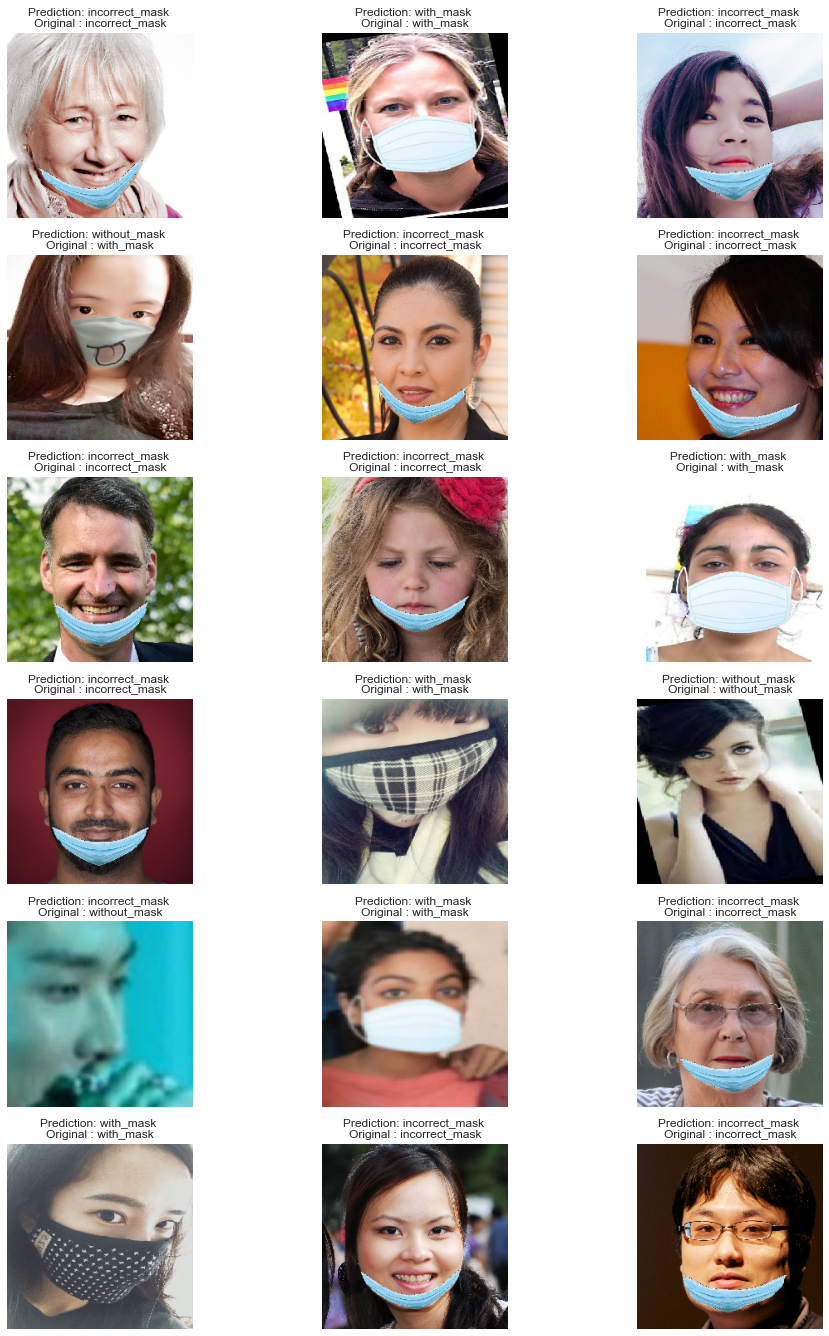

In [69]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image, label = test_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")
